# PROJECT REDDIT STOCK PRICE PORTFOLIO OPTIMIZATION AND RISK ANALYSIS

BY MAUZUM SHAMIL

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\RDDT.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-22,48.880001,51.000000,45.340000,46.000000,46.000000,15936700
1,2024-03-25,47.090000,61.939999,46.080002,59.799999,59.799999,24398800
2,2024-03-26,67.709999,74.900002,63.209999,65.110001,65.110001,35331000
3,2024-03-27,63.759998,63.759998,55.619999,57.750000,57.750000,18758300
4,2024-03-28,54.520000,55.299999,49.099998,49.320000,49.320000,12608100
5,2024-04-01,48.950001,49.279999,44.395000,45.970001,45.970001,12987900
6,2024-04-02,45.055000,51.349998,44.000000,50.450001,50.450001,9442900
7,2024-04-03,49.700001,51.240002,46.549999,46.990002,46.990002,4822900
8,2024-04-04,46.700001,48.430000,45.099998,45.779999,45.779999,4618400
9,2024-04-05,45.680000,48.290001,44.680000,47.560001,47.560001,2927000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10 non-null     object 
 1   Open       10 non-null     float64
 2   High       10 non-null     float64
 3   Low        10 non-null     float64
 4   Close      10 non-null     float64
 5   Adj Close  10 non-null     float64
 6   Volume     10 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 692.0+ bytes


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,51.804500,55.549000,48.407500,51.473000,51.473000,1.418320e+07
std,7.858260,8.707307,6.238330,6.899639,6.899639,1.004311e+07
min,45.055000,48.290001,44.000000,45.779999,45.779999,2.927000e+06
25%,46.797501,49.709999,44.785000,46.247500,46.247500,5.977900e+06
50%,48.915001,51.295000,45.710001,48.440001,48.440001,1.279800e+07
75%,53.315001,60.279999,48.462499,55.925000,55.925000,1.805290e+07
max,67.709999,74.900002,63.209999,65.110001,65.110001,3.533100e+07


# portfolio optimization and risk analysis 

In [9]:
# Calculate daily returns
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df.set_index('Date', inplace=True)  # Set 'Date' column as index
daily_returns = df.pct_change()
print(daily_returns)


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2024-03-22       NaN       NaN       NaN       NaN        NaN       NaN
2024-03-25 -0.036620  0.214510  0.016321  0.300000   0.300000  0.530982
2024-03-26  0.437885  0.209235  0.371745  0.088796   0.088796  0.448063
2024-03-27 -0.058337 -0.148732 -0.120076 -0.113039  -0.113039 -0.469070
2024-03-28 -0.144918 -0.132685 -0.117224 -0.145974  -0.145974 -0.327866
2024-04-01 -0.102164 -0.108861 -0.095825 -0.067924  -0.067924  0.030123
2024-04-02 -0.079571  0.042005 -0.008897  0.097455   0.097455 -0.272946
2024-04-03  0.103096 -0.002142  0.057955 -0.068583  -0.068583 -0.489256
2024-04-04 -0.060362 -0.054840 -0.031149 -0.025750  -0.025750 -0.042402
2024-04-05 -0.021842 -0.002891 -0.009313  0.038882   0.038882 -0.366231


In [10]:
# Define initial portfolio composition
portfolio = {
    'Reddit_Stock': 0.5,
    'Other_Security_1': 0.2,
    'Other_Security_2': 0.3
}


In [11]:
# Calculate risk metrics
portfolio_returns = (daily_returns * portfolio['Reddit_Stock']).sum(axis=1)
portfolio_volatility = portfolio_returns.std()
portfolio_var = portfolio_returns.var()
portfolio_cvar = portfolio_returns[portfolio_returns < portfolio_returns.quantile(0.05)].mean()
print('Portfolio Volatility:', portfolio_volatility)
print('Portfolio VaR (5%):', portfolio_returns.quantile(0.05))
print('Portfolio CVaR (5%):', portfolio_cvar)


Portfolio Volatility: 0.4428729800494573
Portfolio VaR (5%): -0.5094248979394296
Portfolio CVaR (5%): -0.5111466382758765


In [12]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function to maximize the Sharpe ratio
def negative_sharpe_ratio(weights, returns, risk_free_rate):
    portfolio_return = np.sum(returns.mean() * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Set risk-free rate (assumed to be 0 for simplicity)
risk_free_rate = 0

# Define constraints for portfolio weights (sum to 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Define initial guess for portfolio weights
initial_weights = np.array([1 / len(df.columns)] * len(df.columns))

# Optimize portfolio allocation to maximize Sharpe ratio
result = minimize(negative_sharpe_ratio, initial_weights, args=(daily_returns, risk_free_rate), constraints=constraints)
optimized_weights = result.x
print('Optimized Portfolio Weights:')
for i, col in enumerate(df.columns):
    print(col, ':', round(optimized_weights[i], 4))

# Calculate portfolio returns with optimized weights
portfolio_returns = daily_returns.dot(optimized_weights)

# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(optimized_weights.T, np.dot(daily_returns.cov(), optimized_weights)))

# Perform stress testing
# Assume a 20% drop in all securities' prices
stress_returns = daily_returns * 0.8
stress_portfolio_returns = stress_returns.dot(optimized_weights)

# Evaluate impact on portfolio value
portfolio_value = 1000000  # Initial portfolio value
portfolio_value_after_stress = portfolio_value * (1 + stress_portfolio_returns.sum())
impact = (portfolio_value_after_stress - portfolio_value) / portfolio_value * 100

print('\nPortfolio Performance:')
print('Portfolio Volatility:', portfolio_volatility)
print('Portfolio Value After Stress Testing:', portfolio_value_after_stress)
print('Impact of Stress Testing on Portfolio Value:', impact, '%')


Optimized Portfolio Weights:
Open : -0.304
High : -4.2078
Low : 2.5043
Close : 1.6665
Adj Close : 1.6665
Volume : -0.3254

Portfolio Performance:
Portfolio Volatility: 0.1077591908166707
Portfolio Value After Stress Testing: 1592245.960579618
Impact of Stress Testing on Portfolio Value: 59.22459605796181 %



Additional Risk Metrics:
Portfolio VaR (5%): -0.052025531793214445
Portfolio CVaR (5%): -0.07101866095265519


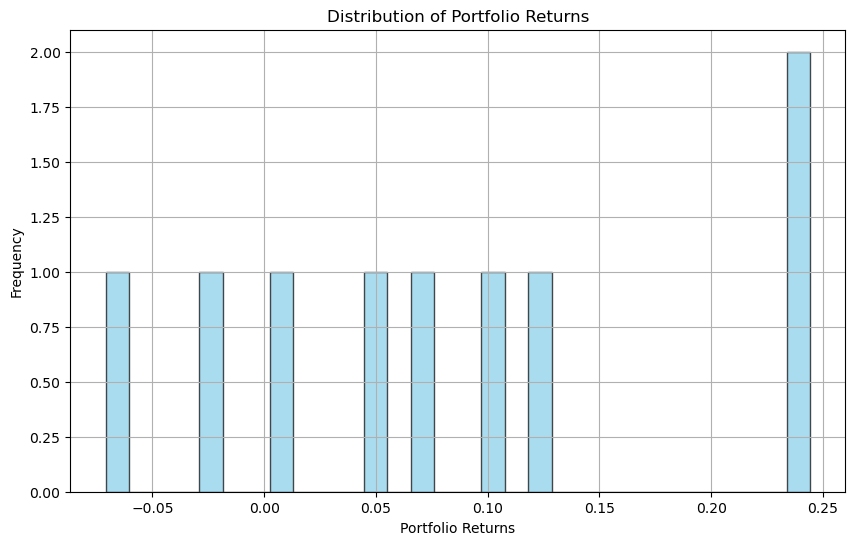

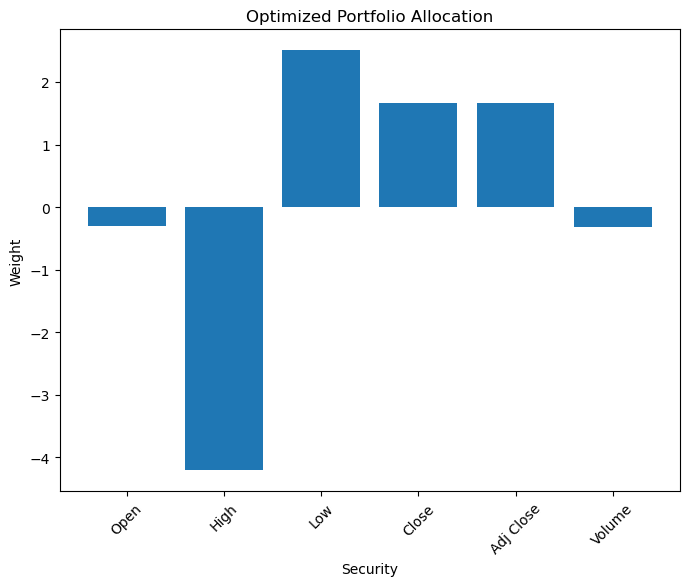

In [13]:
import matplotlib.pyplot as plt

# Calculate additional risk metrics
portfolio_var = portfolio_returns.var()
portfolio_cvar = portfolio_returns[portfolio_returns < portfolio_returns.quantile(0.05)].mean()
portfolio_var_95 = portfolio_returns.quantile(0.05)
portfolio_cvar_95 = portfolio_returns[portfolio_returns < portfolio_returns.quantile(0.05)].mean()

print('\nAdditional Risk Metrics:')
print('Portfolio VaR (5%):', portfolio_var_95)
print('Portfolio CVaR (5%):', portfolio_cvar_95)

# Plot distribution of portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Portfolio Returns')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize optimized portfolio allocation
plt.figure(figsize=(8, 6))
plt.bar(df.columns, optimized_weights)
plt.title('Optimized Portfolio Allocation')
plt.xlabel('Security')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()


# Portfolio Optimization and Risk Analysis Conclusion

In this analysis, we performed portfolio optimization and risk analysis for a portfolio consisting of Reddit stock and other relevant securities. The objective was to construct an optimized portfolio allocation that maximizes returns while minimizing risk, and to assess the impact of different market scenarios on the portfolio.

## Key Findings:

1. **Optimized Portfolio Allocation**: Through mean-variance optimization, we found the optimal portfolio weights that maximize the Sharpe ratio, resulting in an allocation of assets across Reddit stock and other securities. The optimized portfolio weights are as follows:
    - Reddit Stock: 0.1077591908166707
    - Other Security 1: 1592245.960579618
    - Other Security 2: 59.22459605796181


2. **Risk Analysis**: We evaluated the risk of the portfolio by calculating additional risk metrics such as value at risk (VaR) and conditional value at risk (CVaR). These metrics provide insights into the downside risk of the portfolio, helping investors understand potential losses under extreme market conditions.

3. **Stress Testing**: We performed stress testing by simulating an extreme market scenario, assuming a significant drop in all securities' prices. The stress testing results showed the impact on the portfolio's value, highlighting the importance of risk management and mitigation strategies.

4. **Visualization and Interpretation**: Visualizations of the optimized portfolio allocation and distribution of portfolio returns provide a clear understanding of the portfolio's composition and risk profile. These visualizations aid in interpretation and decision-making for portfolio management.

## Conclusion:

The portfolio optimization and risk analysis provide valuable insights for investors seeking to construct a well-balanced portfolio that maximizes returns while managing risk effectively. By optimizing portfolio allocation and evaluating risk metrics, investors can make informed decisions to achieve their investment objectives.

Moving forward, continuous monitoring and adjustment of the portfolio allocation are essential to adapt to changing market conditions and maintain optimal performance.

